In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

%matplotlib inline
sns.set_style('whitegrid')

# Data Analysis

In [2]:
df = pd.read_csv('../input/heart-failure-prediction/heart.csv')

In [3]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


# Exploratory Data Analysis

In [4]:
df.info() #checking information about given dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [5]:
df.isnull().sum() #checking missing values

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [6]:
#showing data types
df.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,918.0,53.510893,9.432617,28.0,47.00,54.0,60.0,77.0
RestingBP,918.0,132.396514,18.514154,0.0,120.00,130.0,140.0,200.0
Cholesterol,918.0,198.799564,109.384145,0.0,173.25,223.0,267.0,603.0
FastingBS,918.0,0.233115,0.423046,0.0,0.00,0.0,0.0,1.0
MaxHR,918.0,136.809368,25.460334,60.0,120.00,138.0,156.0,202.0
Oldpeak,918.0,0.887364,1.066570,-2.6,0.00,0.6,1.5,6.2
HeartDisease,918.0,0.553377,0.497414,0.0,0.00,1.0,1.0,1.0


Univariate Analysis

In [8]:
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

<AxesSubplot:ylabel='Frequency'>

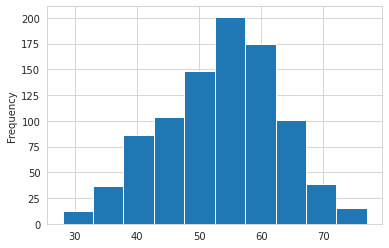

In [9]:
df['Age'].plot(kind = 'hist')

Mean Age of patients: 53.510893246187365


/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


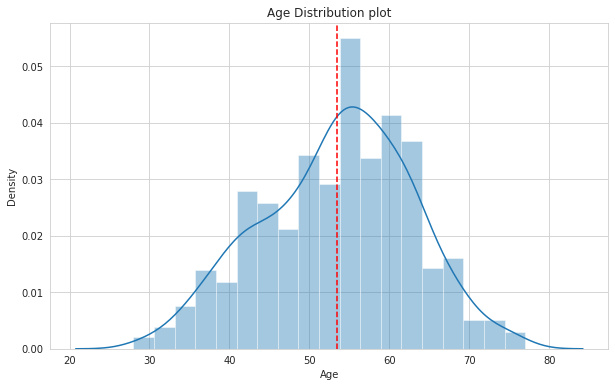

In [10]:
#Distribution plot 
Age_m = df['Age'].describe()
print('Mean Age of patients: {}'.format(Age_m['mean']))

plt.figure(figsize = (10, 6))
sns.distplot(df['Age'])
plt.title('Age Distribution plot')
plt.axvline(Age_m['mean'], linestyle = '--', color = "red")

In [11]:
#Analysis of sex
df['Sex'].value_counts()

M    725
F    193
Name: Sex, dtype: int64

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Patients gender')

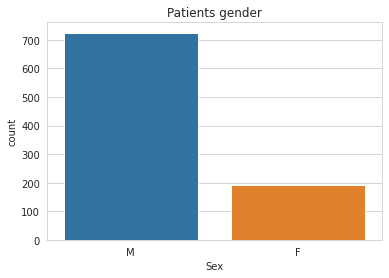

In [12]:
sns.countplot(df['Sex'])
plt.title("Patients gender")

In [13]:
#Analysis of Chestpain
df['ChestPainType'].value_counts()

ASY    496
NAP    203
ATA    173
TA      46
Name: ChestPainType, dtype: int64

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Chest Pain Type')

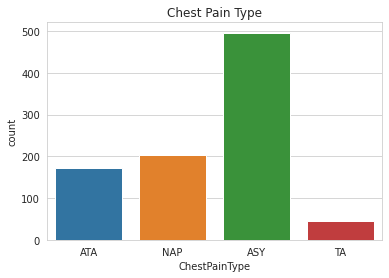

In [14]:
sns.countplot(df['ChestPainType'])
plt.title('Chest Pain Type')

<AxesSubplot:ylabel='Frequency'>

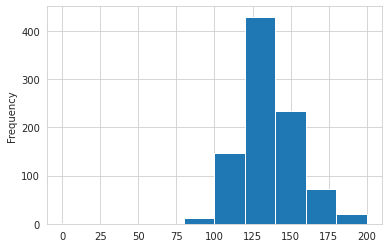

In [15]:
df['RestingBP'].plot(kind = 'hist')

Resting BP mean: 132.39651416122004


/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


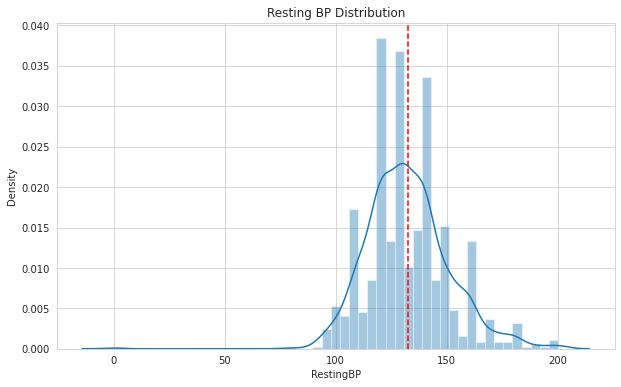

In [16]:
resting_m = df['RestingBP'].describe()
print("Resting BP mean: {}".format(resting_m['mean']))

plt.figure(figsize=(10, 6))
sns.distplot(df['RestingBP'])
plt.title("Resting BP Distribution")
plt.axvline(resting_m['mean'], linestyle = '--', color = 'red')

<AxesSubplot:ylabel='Frequency'>

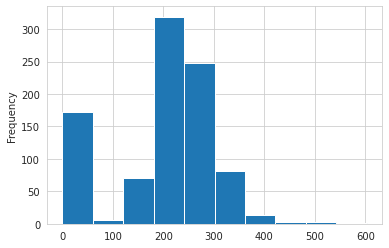

In [17]:
df['Cholesterol'].plot(kind = 'hist')

Mean value of Cholestrol: 198.7995642701525


/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


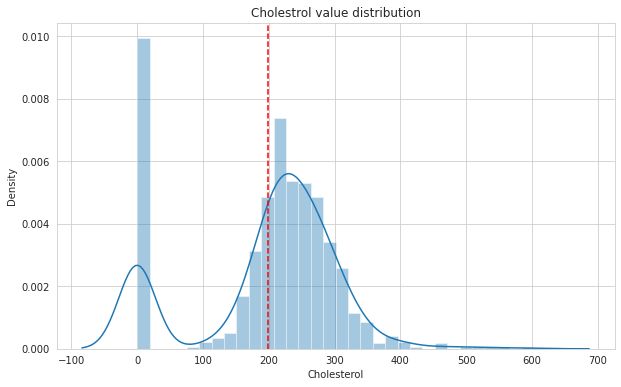

In [18]:
chlo_m = df['Cholesterol'].describe()
print("Mean value of Cholestrol: {}".format(chlo_m['mean']))

plt.figure(figsize=(10, 6))
sns.distplot(df['Cholesterol'])
plt.title('Cholestrol value distribution')
plt.axvline(chlo_m['mean'], linestyle = '--', color = 'red')

0    704
1    214
Name: FastingBS, dtype: int64


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='FastingBS', ylabel='count'>

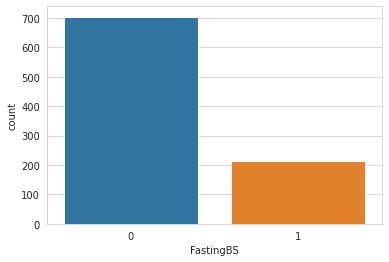

In [19]:
print(df['FastingBS'].value_counts())

sns.countplot(df['FastingBS'])

Resting ECG values: 
Normal    552
LVH       188
ST        178
Name: RestingECG, dtype: int64


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='RestingECG', ylabel='count'>

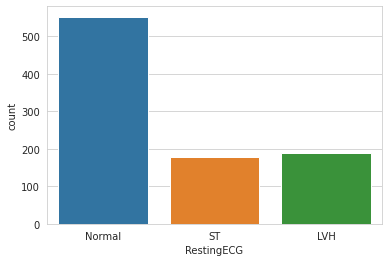

In [20]:
#ANalysis of RestingECG
print("Resting ECG values: ")
print(df['RestingECG'].value_counts())

sns.countplot(df['RestingECG'])

Text(0.5, 1.0, 'Maximum Heart Rate')

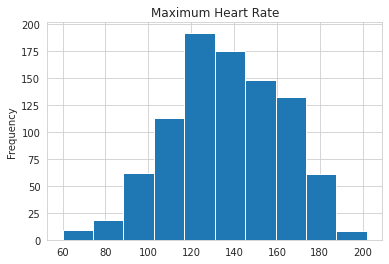

In [21]:
#Analysis of MaxHR
#MaxHR - Maximum Heart Rate
df['MaxHR'].plot(kind = 'hist') #
plt.title('Maximum Heart Rate')

Mean Heart Rate value is: 136.80936819172112


/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Maximum heart rate Distribution')

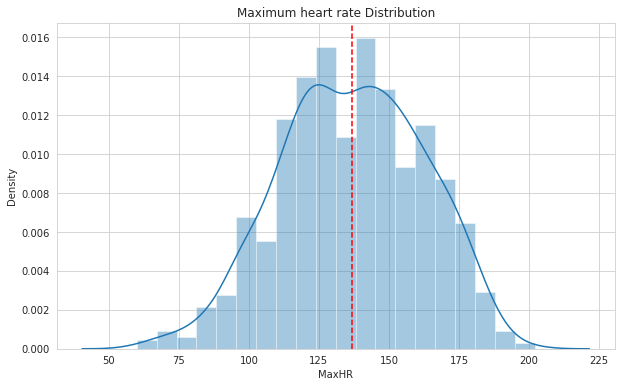

In [22]:
max_m = df['MaxHR'].describe()
print("Mean Heart Rate value is: {}".format(max_m['mean']))

plt.figure(figsize = (10, 6))
sns.distplot(df['MaxHR'])
plt.axvline(max_m['mean'], linestyle = '--', color = "red")
plt.title('Maximum heart rate Distribution')

N    547
Y    371
Name: ExerciseAngina, dtype: int64


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='ExerciseAngina', ylabel='count'>

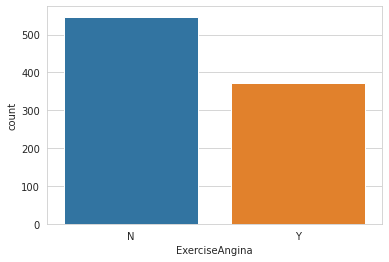

In [23]:
print(df['ExerciseAngina'].value_counts())

sns.countplot(df['ExerciseAngina'])

<AxesSubplot:ylabel='Frequency'>

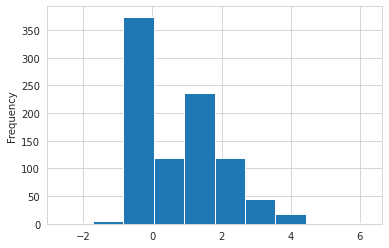

In [24]:
df['Oldpeak'].plot(kind = "hist")

Flat    460
Up      395
Down     63
Name: ST_Slope, dtype: int64


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='ST_Slope', ylabel='count'>

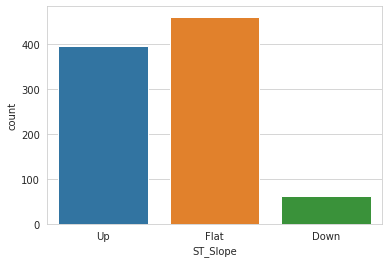

In [25]:
print(df['ST_Slope'].value_counts())

sns.countplot(df['ST_Slope'])

1    508
0    410
Name: HeartDisease, dtype: int64


<AxesSubplot:ylabel='Frequency'>

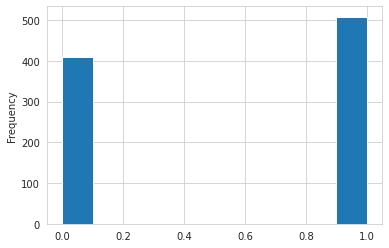

In [26]:
print(df['HeartDisease'].value_counts())
df['HeartDisease'].plot(kind = 'hist')

Bivariate Analysis

In [27]:
fig = px.box(data_frame= df, x = 'Age', y = 'Cholesterol', color = 'Sex', title = "Age vs Cholesterol")
fig.show()

In [28]:
fig = px.box(data_frame= df, x = 'Age', y = 'RestingBP', color = 'Sex', title = "Age vs Resting Blood Pressure")
fig.show()

In [29]:
fig = px.box(data_frame= df, x = 'Age', y = 'MaxHR', color = 'Sex', title = "Age vs Maximum Heart Rate")
fig.show()

In [30]:
px.scatter(data_frame=df, y = 'Age', x = "ChestPainType", color = 'Sex')

In [31]:
px.scatter(data_frame=df, y = "MaxHR", x="ST_Slope", color = 'Sex')

In [32]:
px.box(data_frame=df, y = "RestingBP", x = "RestingECG", color = "Sex")